# Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import tensorflow as tf
import keras

#Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/cars.csv',encoding = "ISO-8859-1")

In [ ]:
#The last layer is completely missing
df.drop(index = len(df)-1, axis = 0, inplace = True)
# These features can't be filled
del_col = ['gearbox','name','postalCode','seller']

df.drop(del_col,axis=1,inplace= True)

In [ ]:
df.head()

,dateCrawled,offerType,price,abtest,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,lastSeen
0,2016-03-24 11:52:17,Angebot,480,test,NaN,1993,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,2016-04-07 03:16:57
1,2016-03-24 10:58:45,Angebot,18300,test,coupe,2011,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,2016-04-07 01:46:50
2,2016-03-14 12:52:21,Angebot,9800,test,suv,2004,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,2016-04-05 12:47:46
3,2016-03-17 16:54:04,Angebot,1500,test,kleinwagen,2001,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Angebot,3600,test,kleinwagen,2008,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,2016-04-06 10:17:21


# Fill missing values

In [ ]:
df.notRepairedDamage.fillna('ja',inplace= True)

In [ ]:
for f in df.columns:
  if(len(df[f].unique()) == 2):
    u1,u2 = df[f].unique()
    df[f] = df[f].map({u1:1,u2:0})

In [ ]:
df = df[ df.vehicleType.notna()]
df = df[df.model.notna()]
df = df[df.fuelType.notna()]

In [ ]:
df = df[df.price != 0 ]

In [ ]:
df.isna().sum()

dateCrawled            0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
lastSeen               0
dtype: int64

# Scale and convert feature values

## Convert non-numeric values to numeric

## Convert time to float

In [ ]:
min_norm = -1
max_norm =1
t_cols = ['dateCrawled','dateCreated','lastSeen']

In [ ]:
for c in t_cols:
  y_max = max(pd.to_datetime(df[c],yearfirst=True))
  y_min = min(pd.to_datetime(df[c],yearfirst=True))
  df[c] = df[c].map(lambda x:(pd.to_datetime(x)- y_min) *(max_norm - min_norm) / (y_max-y_min) + min_norm)

In [ ]:
df.head()

,dateCrawled,offerType,price,abtest,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,lastSeen
2,-0.458010,1,9800,1,suv,2004,163,grand,125000,8,diesel,jeep,1,0.875000,0,0.873387
3,-0.266142,1,1500,1,kleinwagen,2001,75,golf,150000,6,benzin,volkswagen,0,0.890625,0,-0.264773
4,0.583112,1,3600,1,kleinwagen,2008,69,fabia,90000,7,diesel,skoda,0,0.963542,0,0.927613
5,0.825845,1,650,1,limousine,1995,102,3er,150000,10,benzin,bmw,1,0.984375,0,0.950309
6,0.652239,1,2200,1,cabrio,2004,109,2_reihe,150000,8,benzin,peugeot,0,0.968750,0,0.887300


In [ ]:
to_oneH = ['abtest','vehicleType','model','fuelType','brand']
df = pd.get_dummies(df[to_oneH])

KeyError: ignored

In [ ]:
df.head()

,offerType,abtest,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,model_100,model_145,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,...,fuelType_lpg,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
2,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
scl = MinMaxScaler()
scl.fit(df)
data = scl.transform(df)

In [ ]:
y = data[:,3]
x = np.delete(data,3,axis=1)

# Creating the train, test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state = 42)

In [ ]:
x_valid, x_test,y_valid ,y_test = train_test_split(x_test,y_test,test_size =0.5,random_state = 47 )

# Creating model

In [ ]:
model = tf.keras.models.Sequential([
                                    
          tf.keras.layers.Dense(16,input_shape=(306,) ,name='Input_layer'),
          tf.keras.layers.Dense(32,name='Dense2'),
          tf.keras.layers.Dense(64,name="Dense3"),
          tf.keras.layers.Dropout(0.4),
          tf.keras.layers.Dense(128,name='Dense4'),
          tf.keras.layers.Dense(64,name='Dense5'),
          tf.keras.layers.Dropout(0.4),
          tf.keras.layers.Dense(32,name='Dense6'),
          tf.keras.layers.Dense(16,name='Dense7'),

          tf.keras.layers.Dense(1,activation='relu',name = 'last_layer')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mean_squared_error)

In [ ]:
history = model.fit(x_train,y_train,batch_size=10000,epochs=50,validation_data=(x_valid,y_valid))

Epoch 1/50
22/22 [==============================] - 0s 17ms/step - loss: 0.0782 - val_loss: 0.0429
Epoch 2/50
22/22 [==============================] - 0s 12ms/step - loss: 0.0270 - val_loss: 0.0088
Epoch 3/50
22/22 [==============================] - 0s 12ms/step - loss: 0.0095 - val_loss: 0.0044
Epoch 4/50
22/22 [==============================] - 0s 12ms/step - loss: 0.0051 - val_loss: 9.8719e-04
Epoch 5/50
22/22 [==============================] - 0s 12ms/step - loss: 0.0026 - val_loss: 4.4058e-04
Epoch 6/50
22/22 [==============================] - 0s 12ms/step - loss: 0.0019 - val_loss: 3.1960e-04
Epoch 7/50
22/22 [==============================] - 0s 12ms/step - loss: 0.0015 - val_loss: 2.2847e-04
Epoch 8/50
22/22 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 1.9166e-04
Epoch 9/50
22/22 [==============================] - 0s 12ms/step - loss: 0.0011 - val_loss: 1.6367e-04
Epoch 10/50
22/22 [==============================] - 0s 11ms/step - loss: 9.2145e-04 

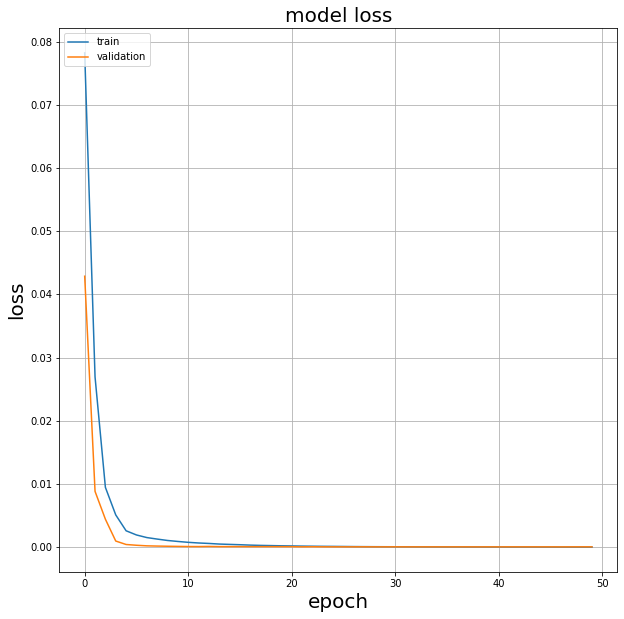

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss',fontsize=20)
plt.ylabel('loss',fontsize = 20)
plt.xlabel('epoch',fontsize=20)
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()
plt.savefig('loss.png')

In [ ]:
model.save('car.h5')

In [ ]:
a = model.predict(x_test)

In [ ]:
match = 0
for ref,res in zip(y_test,a):
  if abs(ref-res) < 0.01:
    match += 1

In [ ]:
match

45108

In [ ]:
len(y_test)

45274

In [ ]:
clf = RandomForestRegressor(n_jobs=-1)
clf.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)